In [42]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
file_path=r"C:\Users\afef.jebali\OneDrive - TUI\Desktop\Training Course\Exercice 01\Market_Basket_Optimisation.csv"
df=pd.read_csv(file_path)
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


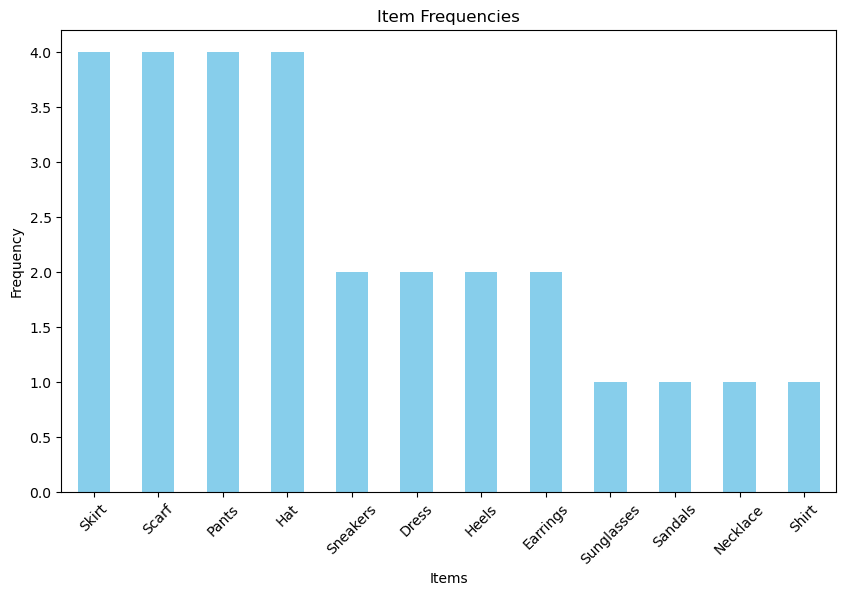

In [44]:
dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
]

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset)

# Get item frequencies
item_counts = df.stack().value_counts()

# Plotting item frequencies
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Item Frequencies')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [45]:
# Convert the dataset to a one-hot encoded format
oht = df.apply(lambda x: pd.Series([1] * len(x)), axis=1).fillna(0)

# Applying the Apriori algorithm
frequent_itemsets = apriori(oht, min_support=0.3, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)


     antecedents         consequents  antecedent support  consequent support  \
0            (0)                 (1)                 1.0                 1.0   
1            (1)                 (0)                 1.0                 1.0   
2            (0)                 (2)                 1.0                 1.0   
3            (2)                 (0)                 1.0                 1.0   
4            (0)                 (3)                 1.0                 1.0   
...          ...                 ...                 ...                 ...   
1927         (2)  (0, 1, 3, 4, 5, 6)                 1.0                 1.0   
1928         (3)  (0, 1, 2, 4, 5, 6)                 1.0                 1.0   
1929         (4)  (0, 1, 2, 3, 5, 6)                 1.0                 1.0   
1930         (5)  (0, 1, 2, 3, 4, 6)                 1.0                 1.0   
1931         (6)  (0, 1, 2, 3, 4, 5)                 1.0                 1.0   

      support  confidence  lift  levera

C:\Users\afef.jebali\AppData\Local\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [46]:
# Display the first few rows of the dataframe
print(df.head())

# Convert the dataset to a boolean format
oht = df.astype(bool)

# Applying the Apriori algorithm
frequent_itemsets = apriori(oht, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)


            0         1         2      3      4      5     6
0       Skirt  Sneakers     Scarf  Pants    Hat   None  None
1  Sunglasses     Skirt  Sneakers  Pants    Hat   None  None
2       Dress   Sandals     Scarf  Pants  Heels   None  None
3       Dress  Necklace  Earrings  Scarf    Hat  Heels   Hat
4    Earrings     Skirt     Skirt  Scarf  Shirt  Pants  None
     antecedents         consequents  antecedent support  consequent support  \
0            (0)                 (1)                 1.0                 1.0   
1            (1)                 (0)                 1.0                 1.0   
2            (0)                 (2)                 1.0                 1.0   
3            (2)                 (0)                 1.0                 1.0   
4            (0)                 (3)                 1.0                 1.0   
...          ...                 ...                 ...                 ...   
1927         (2)  (0, 1, 3, 4, 5, 6)                 1.0                 0

In [47]:
# Provided dataset
dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
]

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset)

# Create a list of unique items
unique_items = list(set([item for sublist in dataset for item in sublist]))

# Create an empty DataFrame with unique items as columns
oht = pd.DataFrame(0, columns=unique_items, index=df.index)

# Update the DataFrame based on the presence of items in each transaction
for index, row in df.iterrows():
    for item in row:
        if item is not None:
            oht.loc[index, item] += 1

# Convert counts to binary values (1 if the count is greater than 0)
oht = (oht > 0).astype(int)

# Applying the Apriori algorithm
frequent_itemsets = apriori(oht, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the generated association rules
print(rules)

     antecedents                                consequents  \
0      (Sandals)                                    (Dress)   
1        (Dress)                                  (Sandals)   
2     (Earrings)                                    (Dress)   
3        (Dress)                                 (Earrings)   
4        (Heels)                                    (Dress)   
...          ...                                        ...   
1135     (Dress)    (Earrings, Heels, Necklace, Scarf, Hat)   
1136     (Heels)    (Earrings, Dress, Necklace, Scarf, Hat)   
1137  (Necklace)       (Earrings, Dress, Heels, Scarf, Hat)   
1138     (Scarf)    (Earrings, Heels, Necklace, Dress, Hat)   
1139       (Hat)  (Earrings, Dress, Heels, Necklace, Scarf)   

      antecedent support  consequent support  support  confidence      lift  \
0                    0.2                 0.4      0.2    1.000000  2.500000   
1                    0.4                 0.2      0.2    0.500000  2.500000   
2     

C:\Users\afef.jebali\AppData\Local\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
